# Sparse Hebbian Learning: toward a quantitative measure of the quality of filters

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import pandas as pd

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 1, 0
DEBUG_DOWNSCALE, verbose = 10, 10
DEBUG_DOWNSCALE, verbose = 1, 10

tag = 'independance'

eta_homeo = 0.1

nb_quant = 128
nb_quant = 256
C = 5.
homeo_methods = ['HEH', 'None']
alpha_homeo = 0.0

homeo_methods = ['HAP', 'None']
alpha_homeo = 0.2

n_iter = 2**13 + 1

record_num_batches = 2**12
N_show = 120
max_patches = 10
seed = 42
np.random.seed(seed)

opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, n_iter=n_iter, 
            eta_homeo=eta_homeo, alpha_homeo=alpha_homeo, 
            C=C, nb_quant=nb_quant, P_cum=None, verbose=verbose)

from shl_scripts.shl_experiments import SHL
shl = SHL(**opts)
data = shl.get_data(matname=tag)

Extracting data..No cache found data_cache/independance_data: Extracting data... Extracting data..Photo2018-01-18_0440462510.jpg, Photo2018-01-18_0309392473.jpg, Photo2018-01-18_0343102547.jpg, Photo2018-02-18_0911262631 square.jpg, Photo2018-01-18_0327052545.jpg, Photo2018-01-18_0440352508.jpg, Photo2018-01-18_0230432458.jpg, Photo2018-01-18_0316462527.jpg, Photo2018-01-18_0553172551.jpg, Photo2018-01-18_0423102502.jpg, Photo2018-01-18_0422432500.jpg, Photo2018-01-18_0441022511.jpg, Data is of shape : (65532, 144) - done in 139.53s.
Data is of shape : (65532, 144) - done in 139.88s.


In [4]:
!ls -l {shl.data_cache}/{tag}*
!rm -fr {shl.data_cache}/{tag}*lock*

-rw-r--r--  1 laurentperrinet  staff  75492992 Feb 23 12:50 data_cache/independance_data.npy


In [5]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.mean(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

number of patches, size of patches =  (65532, 144)
average of patches =  1.2082279857504907e-05  +/-  0.0066444470393307664
average energy of data =  0.029788900141200267 +/- 0.037919085394187625


In [6]:
stick = np.arange(shl.n_dictionary)*nb_quant

indx = np.random.permutation(data.shape[0])[:record_num_batches]
P_cum_zeroeffect = np.linspace(0, 1, nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))


## learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_learn.py) script):

No cache found data_cache/independance_HAP_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65532 patches
Iteration   1 /   8193 (elapsed time:   1s,   0mn   1s)
Iteration  129 /   8193 (elapsed time:  125s,   2mn   5s)
Iteration  257 /   8193 (elapsed time:  240s,   4mn   0s)
Iteration  385 /   8193 (elapsed time:  338s,   5mn  38s)
Iteration  513 /   8193 (elapsed time:  452s,   7mn  32s)
Iteration  641 /   8193 (elapsed time:  563s,   9mn  23s)
Iteration  769 /   8193 (elapsed time:  679s,  11mn  19s)
Iteration  897 /   8193 (elapsed time:  781s,  13mn   1s)
Iteration  1025 /   8193 (elapsed time:  886s,  14mn  46s)
Iteration  1153 /   8193 (elapsed time:  991s,  16mn  31s)
Iteration  1281 /   8193 (elapsed time:  1089s,  18mn   9s)
Iteration  1409 /   8193 (elapsed time:  1185s,  19mn  45s)
Iteration  1537 /   8193 (elapsed time:  1283s,  21mn  23s)
Iteration  1665 /   8193 (elapsed time:  1380s,  23mn   0s)
Iteration  1793 /   8193 (elapsed time:  1473s,  24mn  33s)


Iteration  8193 /   8193 (elapsed time:  4377s,  72mn  57s)
done (total time:  4377s,  73.0mn)
done in 4377.73s.
size of dictionary = (number of filters, size of imagelets) =  (529, 144)
average of filters =  8.799843013552974e-05 +/- 0.009873638293846354
average energy of filters =  1.0 +/- 9.043487695512937e-17


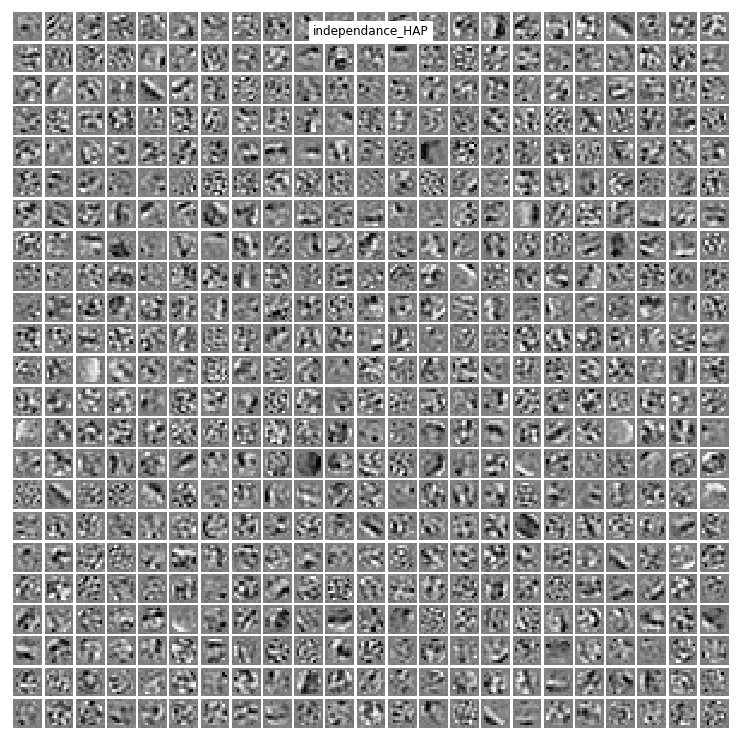

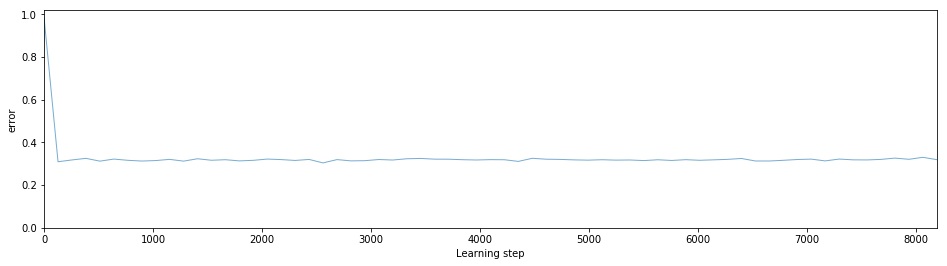

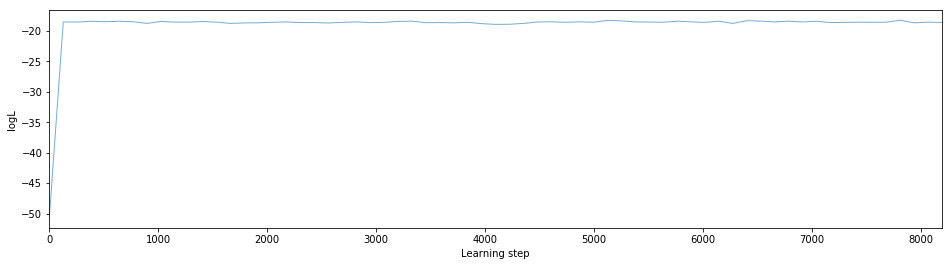

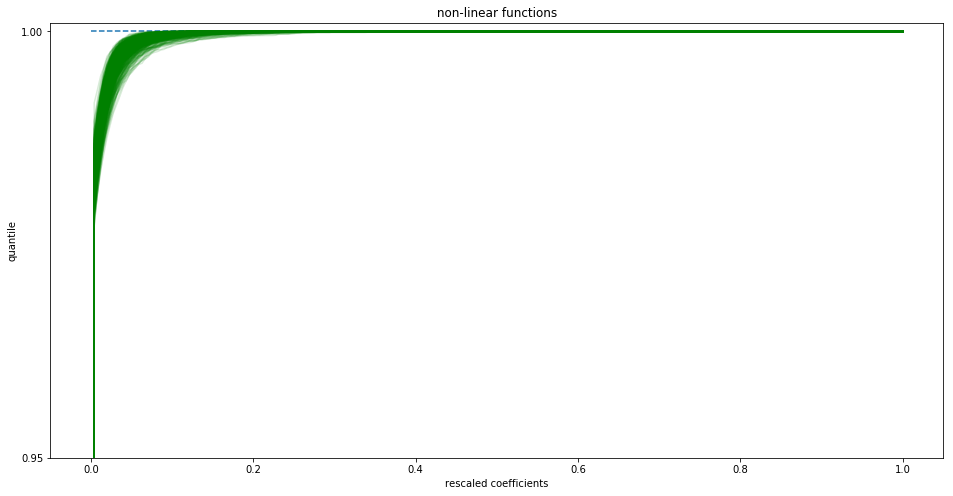

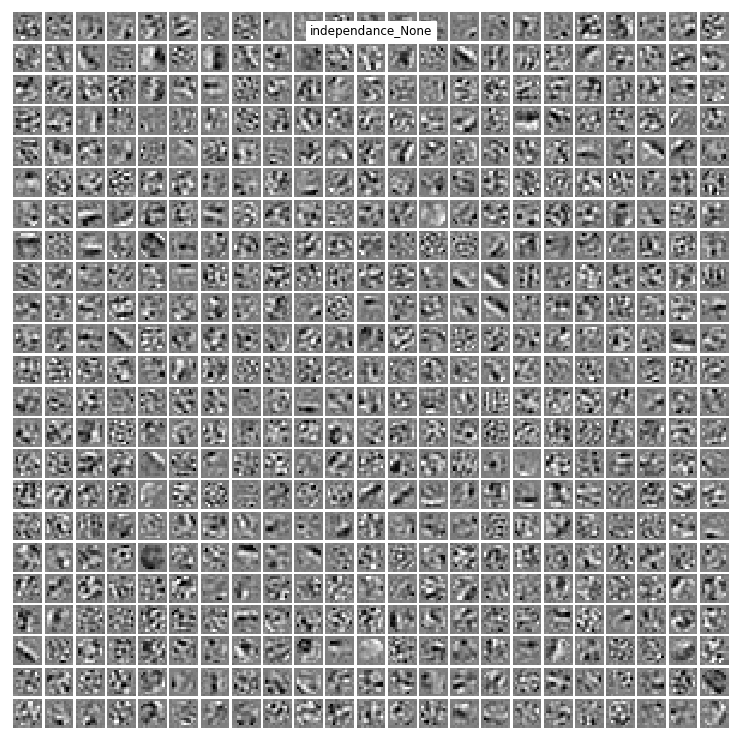

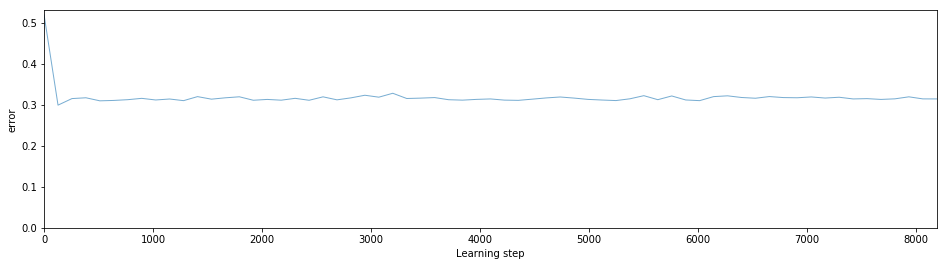

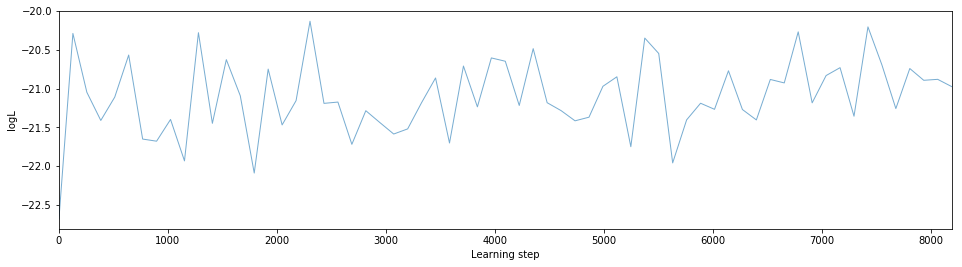

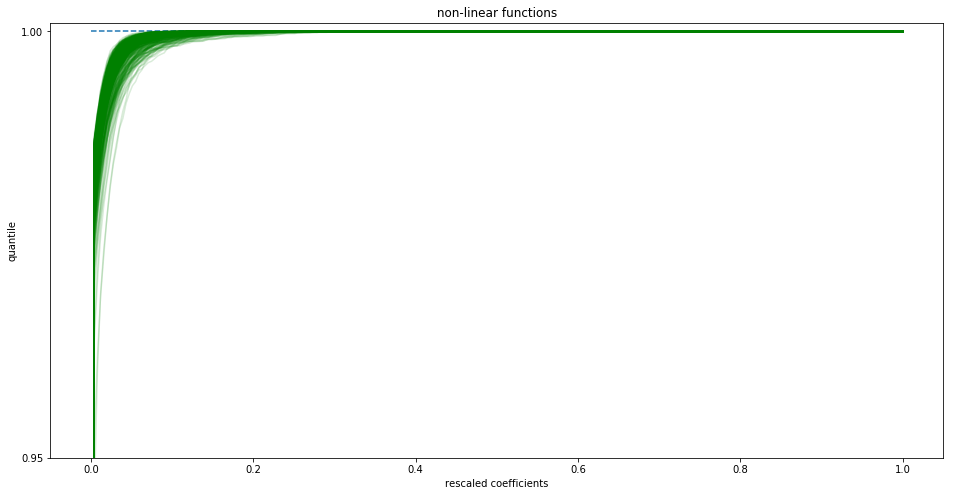

In [7]:
list_figures = ['show_dico', 'time_plot_error', 'time_plot_logL']

dico = {}
for homeo_method in homeo_methods:
    shl = SHL(homeo_method=homeo_method, **opts)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)

    print('size of dictionary = (number of filters, size of imagelets) = ', dico[homeo_method].dictionary.shape)
    print('average of filters = ',  dico[homeo_method].dictionary.mean(axis=1).mean(), 
          '+/-',  dico[homeo_method].dictionary.mean(axis=1).std())
    SE = np.sqrt(np.sum(dico[homeo_method].dictionary**2, axis=1))
    print('average energy of filters = ', SE.mean(), '+/-', SE.std())

    if not dico[homeo_method].P_cum is None: 
        from shl_scripts.shl_tools import plot_P_cum
        fig, ax = plot_P_cum(dico[homeo_method].P_cum, verbose=False, alpha=.15);
        ax.set_ylim(0.95, 1.001)
        #ax.set_xmargin(0.);

## theory



Sum of non-zero coefficients 61661 ~= 61440
average non-zeros 116.56143667296786 ~= 116.14366729678639


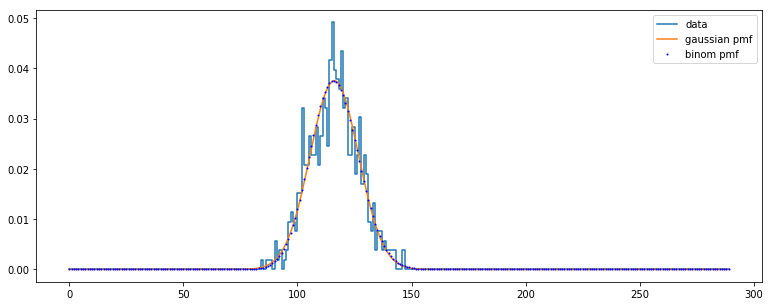

In [8]:
from scipy.stats import binom
# define the mean
rho = shl.l0_sparseness / shl.n_dictionary

# draw binomial samples
sparse_code_binary = np.random.rand(record_num_batches, shl.n_dictionary) > 1 - rho

# define the theoretical standard deviation
sd = np.sqrt(rho*(1-rho)*record_num_batches)

# the binomial probability is defined from 0 to record_num_batches \times shl.n_dictionary
# for visualization, we show the part around non-zero probabilities:
#record_num_batches_high = int(rho * record_num_batches + 15. * sd)
record_num_batches_high = int(2.5 * rho * record_num_batches)
bins = np.arange(record_num_batches_high)

print('Sum of non-zero coefficients', sparse_code_binary.sum(), '~=', shl.l0_sparseness*record_num_batches)
print('average non-zeros', np.count_nonzero(sparse_code_binary, axis=0).mean(), '~=', rho*record_num_batches)
fig, ax= plt.subplots(figsize=(13, 5))
smarts, edges = np.histogram(np.count_nonzero(sparse_code_binary, axis=0), density=True, bins=bins)
smarts /= smarts.sum()
ax.step(edges, np.hstack((smarts, 0)), where='pre', label='data');
#edges_mid = .5*( edges[1:] + edges[:-1] )
#print(rho, s, edges)
proba = np.exp(-.5 * (edges - rho*record_num_batches)**2 / sd**2)
proba /= proba.sum()
ax.plot(edges, proba, label='gaussian pmf');
proba_binom = binom.pmf(edges, record_num_batches, rho)
proba_binom /= proba_binom.sum()
ax.plot(edges, proba_binom, 'bo', ms=1, label='binom pmf')
ax.legend()

In [9]:
def get_logL(sparse_code):
    record_num_batches = sparse_code.shape[0]
    rho_hat = np.count_nonzero(sparse_code_binary, axis=0).mean()/record_num_batches
    #rho = shl.l0_sparseness / shl.n_dictionary
    sd = np.sqrt(rho_hat*(1-rho_hat)*record_num_batches)

    measures = np.count_nonzero(sparse_code, axis=0)

    # likelihood = 1 / np.sqrt(2*np.pi) / sd *  np.exp(-.5 * (measures - rho)**2 / sd**2)
    logL = -.5 * (measures - rho_hat*record_num_batches)**2 / sd**2
    logL -= np.log(np.sqrt(2*np.pi) * sd)
    #print(np.log(np.sum(np.exp(logL))), np.log(np.sqrt(2*np.pi) * sd))
    #logL -= np.log(np.sum(np.exp(logL)))
    return logL
    

In [10]:
rho = shl.l0_sparseness / shl.n_dictionary
sd = np.sqrt(rho*(1-rho)*record_num_batches)

for _ in range(10):
    sparse_code_binary = np.random.rand(record_num_batches, shl.n_dictionary) > 1 - rho
    logL = get_logL(sparse_code_binary)
    print ('log-likelihood for random sample=', logL.mean(), '+/-', logL.std())


log-likelihood for random sample= -3.8413575711444787 +/- 0.7640164876465988
log-likelihood for random sample= -3.7712253964043647 +/- 0.661799878735087
log-likelihood for random sample= -3.80671636959599 +/- 0.6867407255154326
log-likelihood for random sample= -3.756460576299145 +/- 0.6954234822008071
log-likelihood for random sample= -3.798820245104324 +/- 0.7279873587228746
log-likelihood for random sample= -3.769598135574093 +/- 0.7008996620481944
log-likelihood for random sample= -3.7684095261913835 +/- 0.7035427972908814
log-likelihood for random sample= -3.808650120738034 +/- 0.7525055258094857
log-likelihood for random sample= -3.8046184922368913 +/- 0.7600583257769603
log-likelihood for random sample= -3.784350244673539 +/- 0.7583415614026026


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

In [11]:
from shl_scripts.shl_tools import show_data
def print_stats(data, dictionary, sparse_code):
    print(42*'🐒')

    print('number of codes, size of codewords = ', sparse_code.shape)
    print('average of codewords = ', sparse_code.mean())
    print('average std of codewords = ', sparse_code.std())
    print('l0-sparseness of codewords = ', (sparse_code>0).mean(), ' ~= l0/M =', shl.l0_sparseness/shl.n_dictionary)
    print('std of the average of individual patches = ', sparse_code.mean(axis=0).std())


    plt.matshow(sparse_code[:N_show, :])
    plt.show()
    fig, axs = show_data(data[:max_patches, :])
    plt.show()

    patches = sparse_code @ dictionary
    error = data - patches
    
    print('number of codes, size of reconstructed images = ', patches.shape)

    fig, axs = show_data(patches[:max_patches, :])
    plt.show()
    fig, axs = show_data(error[:max_patches, :], cmax=np.max(np.abs(patches[:max_patches, :])))
    plt.show()
    print('average of data patches = ', data.mean(), '+/-', data.mean(axis=1).std())
    print('average of residual patches = ', error.mean(), '+/-', error.mean(axis=1).std())
    SD = np.sqrt(np.mean(data**2, axis=1))

    print('median energy of data = ', np.median(SD))
    print('average energy of data = ', SD.mean(), '+/-', SD.std())
    
    SE = np.sqrt(np.mean(error**2, axis=1))

    print('average energy of residual = ', SE.mean(), '+/-', SE.std())
    print('median energy of residual = ', np.median(SE))
    print('average gain of coding = ', (SD/SE).mean(), '+/-', (SD/SE).std())
    
    return SD, SE

In [12]:
homeo_methods

['HAP', 'None']

🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 529)
average of codewords =  0.002139781543136902
average std of codewords =  0.023064469414803498
l0-sparseness of codewords =  0.028089555765595464  ~= l0/M = 0.02835538752362949
std of the average of individual patches =  0.0018487482238427595


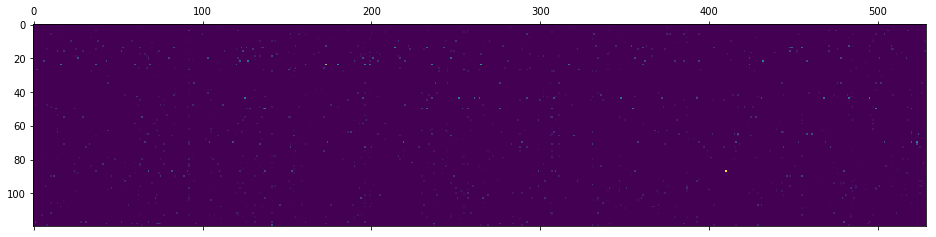

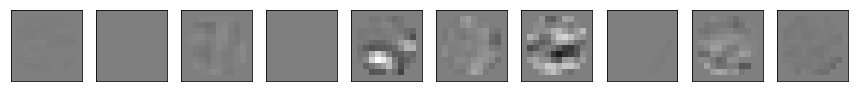

number of codes, size of reconstructed images =  (4096, 144)


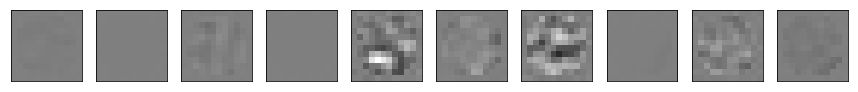

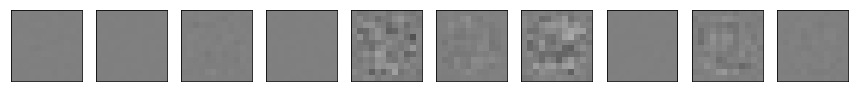

average of data patches =  4.979067591476194e-05 +/- 0.006524584306562247
average of residual patches =  0.0001672805567173411 +/- 0.0016922762623914687
median energy of data =  0.017995085415976962
average energy of data =  0.029609307882095835 +/- 0.03819642946055566
average energy of residual =  0.012017783519051278 +/- 0.01517196065172207
median energy of residual =  0.008281610110349707
average gain of coding =  2.961912358473865 +/- 1.212293909356472
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 529)
average of codewords =  0.002161857396201313
average std of codewords =  0.023039924638770148
l0-sparseness of codewords =  0.02825570061436673  ~= l0/M = 0.02835538752362949
std of the average of individual patches =  0.0016451304780630098


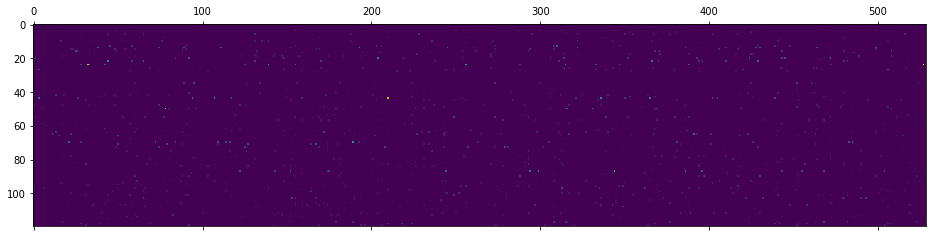

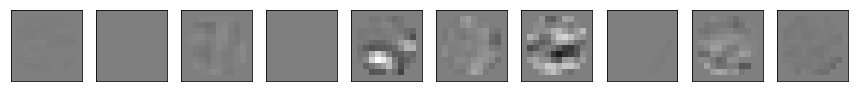

number of codes, size of reconstructed images =  (4096, 144)


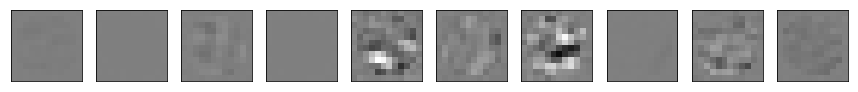

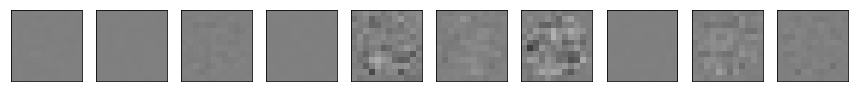

average of data patches =  4.979067591476194e-05 +/- 0.006524584306562247
average of residual patches =  1.8569485118773587e-05 +/- 0.0023791697284206168
median energy of data =  0.017995085415976962
average energy of data =  0.029609307882095835 +/- 0.03819642946055566
average energy of residual =  0.011992131325683011 +/- 0.015205444811665983
median energy of residual =  0.008261632955621477
average gain of coding =  2.8997834059775807 +/- 1.0507989790178003


In [13]:
from shl_scripts.shl_encode import sparse_encode
sparse_code = {}
for homeo_method in homeo_methods:
    if dico[homeo_method].P_cum is None: 
        gain = np.ones(shl.n_dictionary)
    else:
        gain = None
    sparse_code[homeo_method] = sparse_encode(data[indx, :], dico[homeo_method].dictionary, 
                                 P_cum=dico[homeo_method].P_cum, l0_sparseness = shl.l0_sparseness, C=C, gain=gain)
    SD, SE = print_stats(data[indx, :], dico[homeo_method].dictionary, sparse_code[homeo_method])

In [14]:
sparse_code[homeo_method].shape

(4096, 529)

Average of non-zero coefficients 0.028089555765595464 ~= 0.02835538752362949
Mean of non-zero coefficients 115.05482041587902 ~= 116.14366729678639
Mean of non-zero coefficients 115.05482041587902 +/- 118.84263403303189
Median of non-zero coefficients 78.0
Average of non-zero coefficients 0.02825570061436673 ~= 0.02835538752362949
Mean of non-zero coefficients 115.73534971644612 ~= 116.14366729678639
Mean of non-zero coefficients 115.73534971644612 +/- 84.29966070967407
Median of non-zero coefficients 91.0


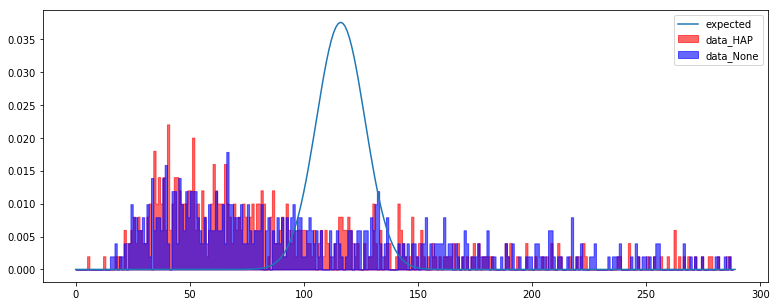

In [15]:
rho = shl.l0_sparseness / shl.n_dictionary
sd = np.sqrt(rho*(1-rho)*record_num_batches)

fig, ax= plt.subplots(figsize=(13, 5))
for homeo_method, color in zip(homeo_methods, ['r', 'b']):
    print('Average of non-zero coefficients', (sparse_code[homeo_method]>0).mean(), '~=', rho)
    n_i = np.count_nonzero(sparse_code[homeo_method], axis=0)
    print('Mean of non-zero coefficients', n_i.mean(), '~=', rho*record_num_batches)
    print('Mean of non-zero coefficients', n_i.mean(), '+/-', n_i.std())
    print('Median of non-zero coefficients', np.median(n_i))
    smarts, edges = np.histogram(n_i, density=True, bins=bins)
    smarts /= smarts.sum()
    # ax.step(edges, np.hstack((smarts, 0)), where='pre', label='data_' + homeo_method);
    ax.fill_between(edges[:-1], smarts, step='pre', label='data_' + homeo_method, alpha=.6, color=color);

proba = 1 / np.sqrt(2*np.pi) / sd *  np.exp(-.5 * (edges - rho*record_num_batches)**2 / sd**2)
#proba /= proba.sum()
ax.plot(edges, proba, label='expected')
ax.legend();

In [16]:
rho, sparse_code[homeo_method].mean(), homeo_methods

(0.02835538752362949, 0.002161857396201313, ['HAP', 'None'])

## measuring the distance to independance 

In [17]:
#fig, ax= plt.subplots(figsize=(13, 5))
for homeo_method in homeo_methods:
    logL = get_logL(sparse_code[homeo_method])
    print ('log-likelihood for homeo_method=', homeo_method, 'is', logL.mean(), '+/-', logL.std())
    #ax.vline(edges, proba, label=homeo_method)

logL = get_logL(np.random.rand(record_num_batches, shl.n_dictionary) > 1 - rho)
print ('log-likelihood for theory=', homeo_method, 'is', logL.mean(), '+/-', logL.std())
#for _ in range(10):
#    logL = get_logL(np.random.rand(record_num_batches, shl.n_dictionary) > 1 - rho)
#ax.plot(edges, proba, label='theory')
#ax.legend();

log-likelihood for homeo_method= HAP is -65.92550836949088 +/- 269.26872840458435
log-likelihood for homeo_method= None is -34.79979016342902 +/- 66.75308230101733
log-likelihood for theory= None is -3.772066652662667 +/- 0.6950292030676162


## Version used

In [18]:
%load_ext version_information
%version_information numpy, shl_scripts, pandas

Software versions
Python 3.6.4 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
IPython 6.2.1
OS Darwin 17.4.0 x86_64 i386 64bit
numpy 1.14.1
shl_scripts 20171221
pandas 0.22.0
Fri Feb 23 15:46:54 2018 CET